In [147]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('processed_dataset.csv')
df

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1590,-0.937255,-0.918628,-0.702621,-0.826405,-1.354148,-0.668841,-1.047533,-0.500224,-0.795354,0.123637,...,-0.605875,-1.061373,-0.895156,-0.509345,0.194800,-0.608045,-0.242083,-0.476529,0.178774,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1593 non-null   float64
 1   pctWWage                 1593 non-null   float64
 2   perCapInc                1593 non-null   float64
 3   whitePerCap              1593 non-null   float64
 4   blackPerCap              1593 non-null   float64
 5   indianPerCap             1593 non-null   float64
 6   asianPerCap              1593 non-null   float64
 7   otherPerCap              1593 non-null   float64
 8   HispPerCap               1593 non-null   float64
 9   pctPopUnderPov           1593 non-null   float64
 10  PctNotHSGrad             1593 non-null   float64
 11  PctBSorMore              1593 non-null   float64
 12  PctUnemployed            1593 non-null   float64
 13  PctEmploy                1593 non-null   float64
 14  HouseholdSize           

In [150]:
df.drop(['Log_NumInShelters', 'Log_NumStreet', 'Log_murders', 'Log_murdPerPop'], axis = 1, inplace = True)
df

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1590,-0.937255,-0.918628,-0.702621,-0.826405,-1.354148,-0.668841,-1.047533,-0.500224,-0.795354,0.123637,...,-0.605875,-1.061373,-0.895156,-0.509345,0.194800,-0.608045,-0.242083,-0.476529,0.178774,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1593 non-null   float64
 1   pctWWage                 1593 non-null   float64
 2   perCapInc                1593 non-null   float64
 3   whitePerCap              1593 non-null   float64
 4   blackPerCap              1593 non-null   float64
 5   indianPerCap             1593 non-null   float64
 6   asianPerCap              1593 non-null   float64
 7   otherPerCap              1593 non-null   float64
 8   HispPerCap               1593 non-null   float64
 9   pctPopUnderPov           1593 non-null   float64
 10  PctNotHSGrad             1593 non-null   float64
 11  PctBSorMore              1593 non-null   float64
 12  PctUnemployed            1593 non-null   float64
 13  PctEmploy                1593 non-null   float64
 14  HouseholdSize           

In [152]:
df.dropna(how="any", inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1592
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1225 non-null   float64
 1   pctWWage                 1225 non-null   float64
 2   perCapInc                1225 non-null   float64
 3   whitePerCap              1225 non-null   float64
 4   blackPerCap              1225 non-null   float64
 5   indianPerCap             1225 non-null   float64
 6   asianPerCap              1225 non-null   float64
 7   otherPerCap              1225 non-null   float64
 8   HispPerCap               1225 non-null   float64
 9   pctPopUnderPov           1225 non-null   float64
 10  PctNotHSGrad             1225 non-null   float64
 11  PctBSorMore              1225 non-null   float64
 12  PctUnemployed            1225 non-null   float64
 13  PctEmploy                1225 non-null   float64
 14  HouseholdSize           

In [154]:
cor_df = df.copy(deep=True)
cor_df

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,-1.436723,-2.100658,-0.767483,-0.855929,-0.706228,-0.527513,1.455122,-0.643885,-0.570320,1.974283,...,0.430378,1.195098,1.060460,1.056291,0.756143,0.449139,-0.058941,1.116249,1.129962,WV
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


In [155]:
cor_df.drop(['PctKids2Par', 'Log_racepctwhite', 'HispPerCap', 'perCapInc', 'HouseholdSize', 'blackPerCap', 'whitePerCap', 'asianPerCap', 'otherPerCap', 'PctEmploy', 'pctWWage', 'PctBSorMore', 'Log_agepct65up', 'indianPerCap', 'PctNotHSGrad', 'Log_agepct12t21', 'PctUnemployed', 'Log_agepct16t24', 'Log_racepctasian', 'PctImmigRecent', 'PctImmigRec5', 'Log_racepcthisp', 'pctPopUnderPov', 'Log_agepct12t29', 'Log_racepctblack', 'Log_rapesPerPop', 'Log_burglPerPop', 'Log_autoTheftPerPop', 'TotalPctDiv', 'Log_arsonsPerPop', 'Log_larcPerPop'], axis=1, inplace=True)

In [156]:
cor_use_df = cor_df.copy(deep=True)

In [157]:
cor_use_df.drop('State', axis = 1, inplace = True)

In [158]:
use_df = df
use_df

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,-1.436723,-2.100658,-0.767483,-0.855929,-0.706228,-0.527513,1.455122,-0.643885,-0.570320,1.974283,...,0.430378,1.195098,1.060460,1.056291,0.756143,0.449139,-0.058941,1.116249,1.129962,WV
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


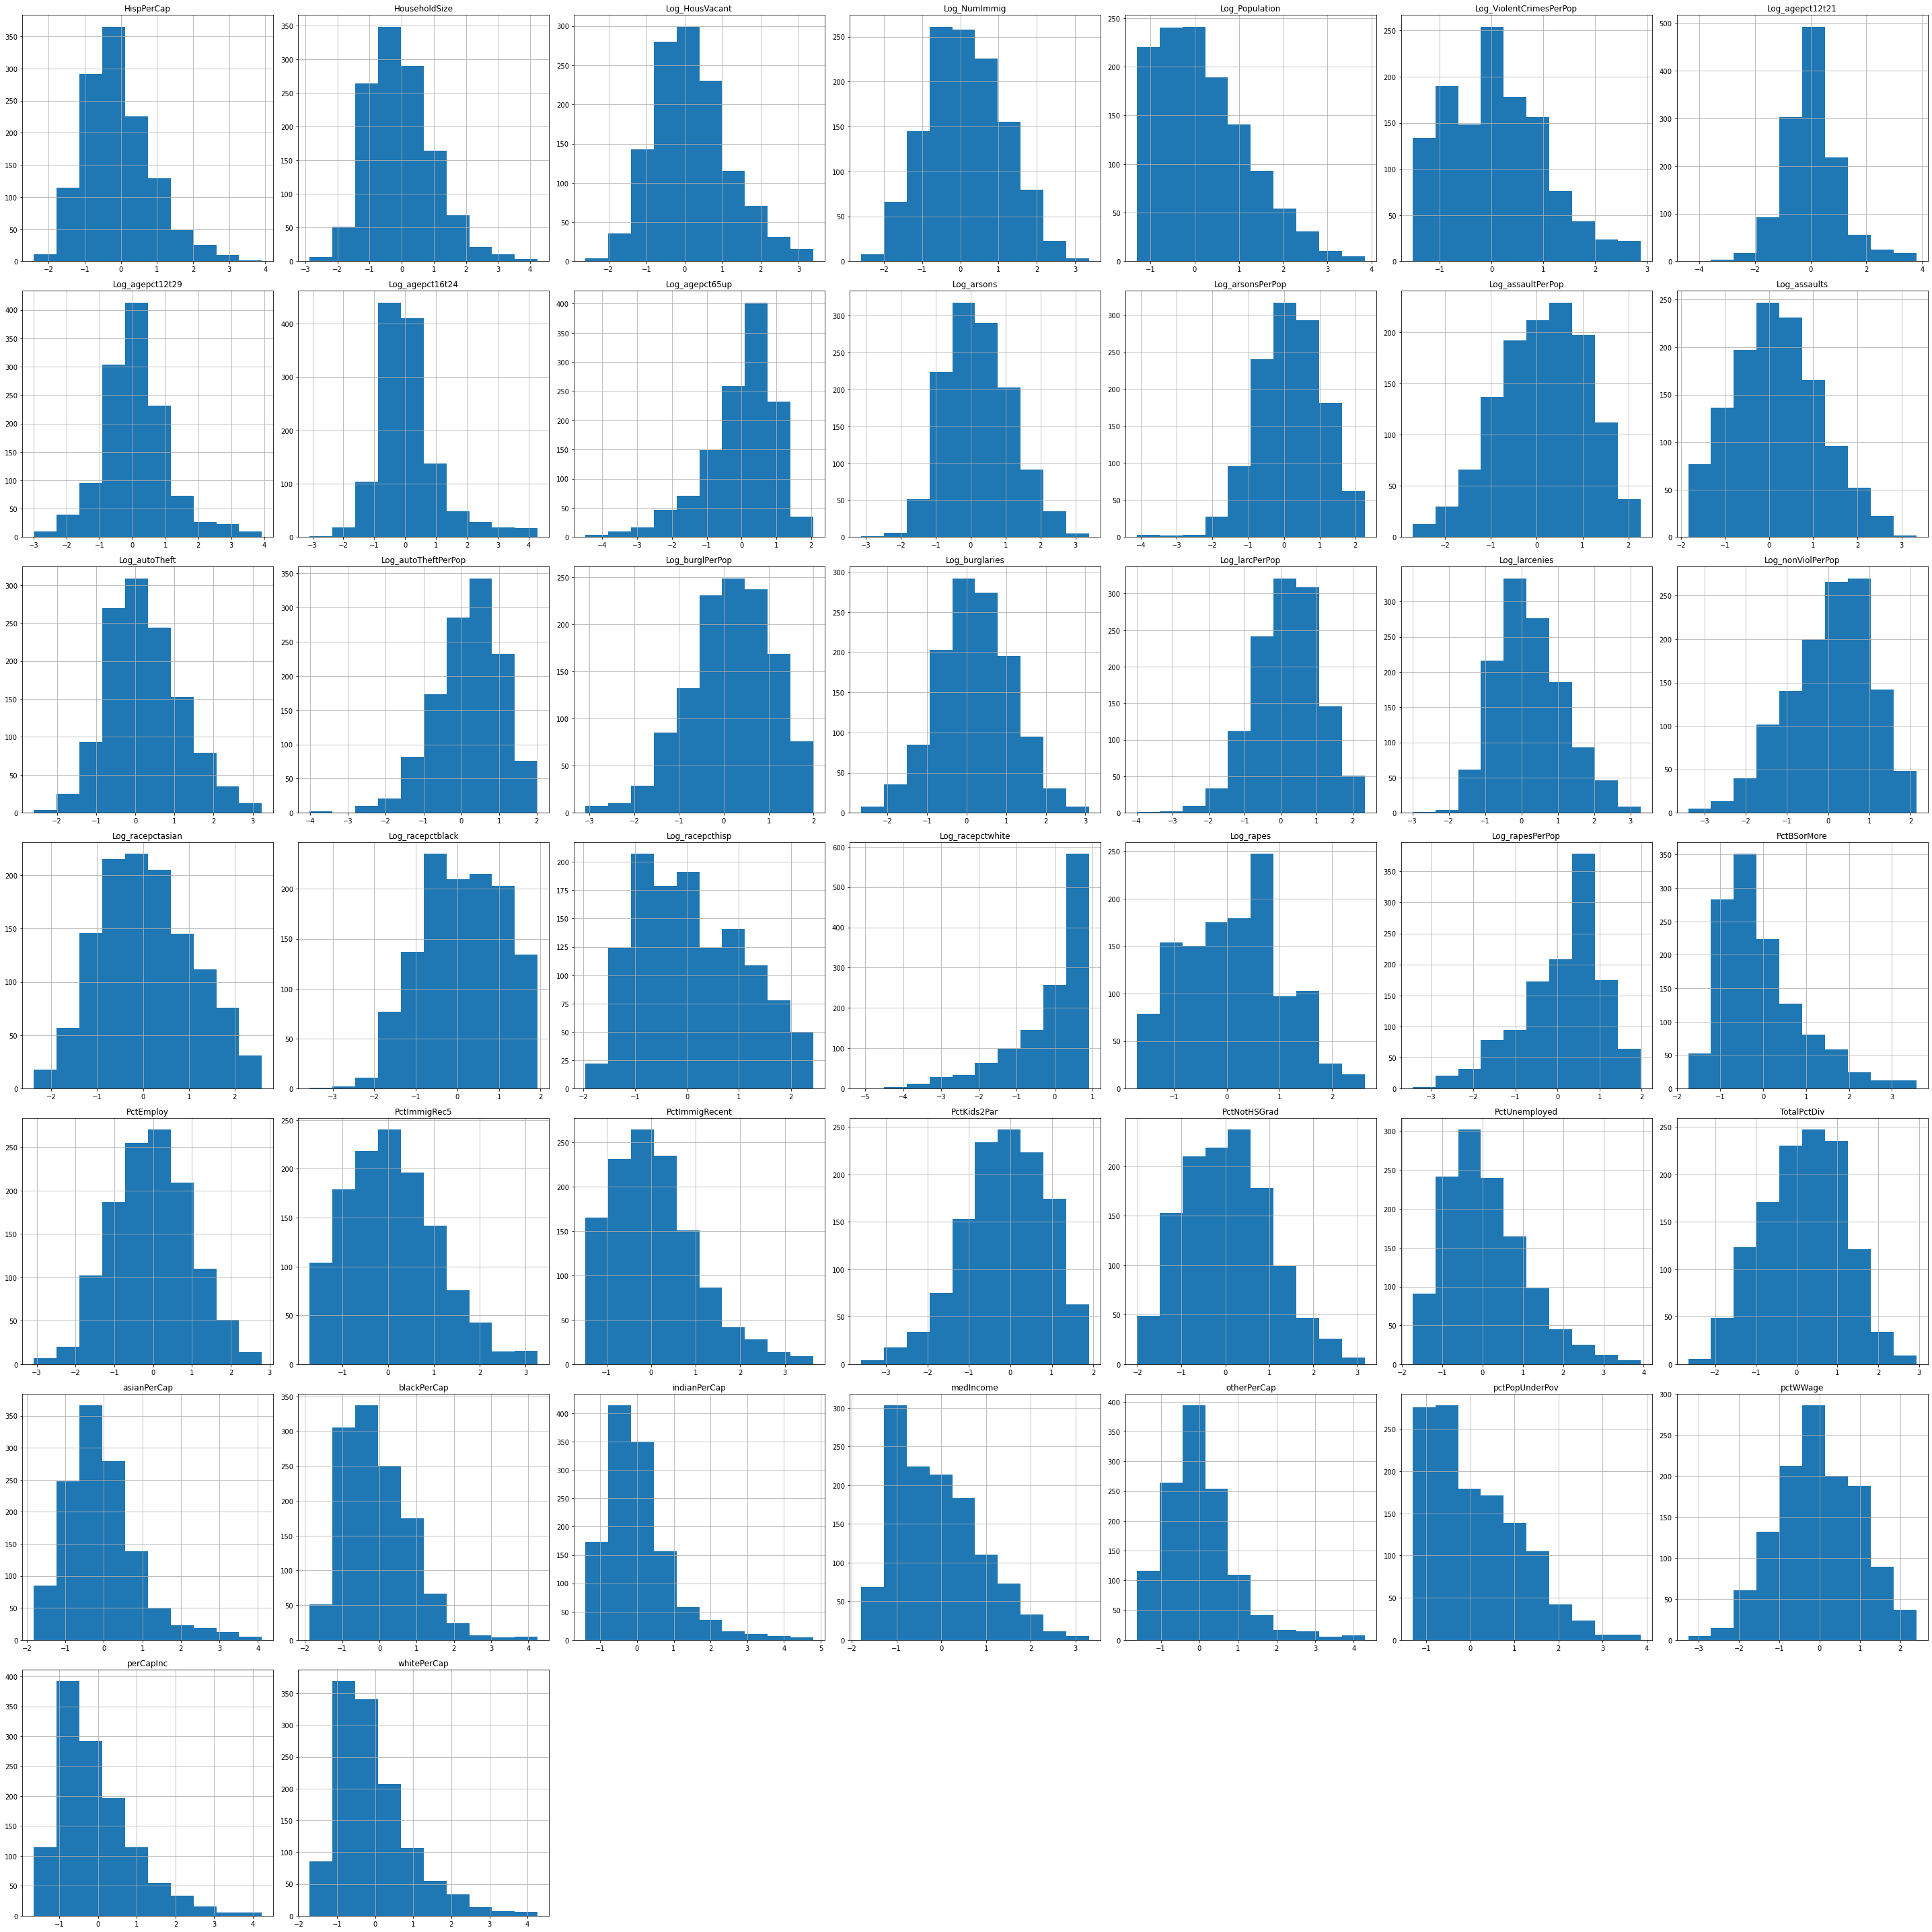

In [159]:
use_df.hist(figsize=(40,40))
plt.tight_layout()
plt.show()

In [160]:
df_6clust = pd.read_csv('standardized_dataset.csv')
df_6clust

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1590,-0.937255,-0.918628,-0.702621,-0.826405,-1.354148,-0.668841,-1.047533,-0.500224,-0.795354,0.123637,...,-0.605875,-1.061373,-0.895156,-0.509345,0.194800,-0.608045,-0.242083,-0.476529,0.178774,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


In [161]:
df_6clust.drop(['Log_NumInShelters', 'Log_NumStreet', 'Log_murders', 'Log_murdPerPop'], axis = 1, inplace = True)
df_6clust

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY
1590,-0.937255,-0.918628,-0.702621,-0.826405,-1.354148,-0.668841,-1.047533,-0.500224,-0.795354,0.123637,...,-0.605875,-1.061373,-0.895156,-0.509345,0.194800,-0.608045,-0.242083,-0.476529,0.178774,WY
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY


In [162]:
df_6clust.dropna(how="any", inplace=True)

In [163]:
df_6clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1592
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1225 non-null   float64
 1   pctWWage                 1225 non-null   float64
 2   perCapInc                1225 non-null   float64
 3   whitePerCap              1225 non-null   float64
 4   blackPerCap              1225 non-null   float64
 5   indianPerCap             1225 non-null   float64
 6   asianPerCap              1225 non-null   float64
 7   otherPerCap              1225 non-null   float64
 8   HispPerCap               1225 non-null   float64
 9   pctPopUnderPov           1225 non-null   float64
 10  PctNotHSGrad             1225 non-null   float64
 11  PctBSorMore              1225 non-null   float64
 12  PctUnemployed            1225 non-null   float64
 13  PctEmploy                1225 non-null   float64
 14  HouseholdSize           

In [164]:
ud6 = df_6clust.copy(deep=True)

In [165]:
ud6.drop('State', axis = 1, inplace = True)

In [166]:
ud6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1592
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1225 non-null   float64
 1   pctWWage                 1225 non-null   float64
 2   perCapInc                1225 non-null   float64
 3   whitePerCap              1225 non-null   float64
 4   blackPerCap              1225 non-null   float64
 5   indianPerCap             1225 non-null   float64
 6   asianPerCap              1225 non-null   float64
 7   otherPerCap              1225 non-null   float64
 8   HispPerCap               1225 non-null   float64
 9   pctPopUnderPov           1225 non-null   float64
 10  PctNotHSGrad             1225 non-null   float64
 11  PctBSorMore              1225 non-null   float64
 12  PctUnemployed            1225 non-null   float64
 13  PctEmploy                1225 non-null   float64
 14  HouseholdSize           

In [194]:
SSE_5 = []
for i in range (1,16):
    kmodel_5 = KMeans(n_clusters = i, random_state = 424)
    kmodel_5.fit(ud6)
    SSE_5.append(kmodel_5.inertia_)
    
SSE_5

[50646.61361075824,
 40263.64204516414,
 35130.337606904046,
 32848.38791375656,
 30982.417329489494,
 29761.244488774133,
 28632.349501978457,
 27861.531818436742,
 27173.436863496536,
 26547.396226287394,
 26153.258128032077,
 25547.655056940548,
 25191.249752806234,
 24881.513710389238,
 24582.43217878263]

In [168]:
SSE_cor = []
for i in range (1,16):
    kmodel_cor = KMeans(n_clusters = i, random_state = 424)
    kmodel_cor.fit(cor_use_df)
    SSE_cor.append(kmodel_cor.inertia_)
    
SSE_cor

[14969.956774667062,
 9075.366848741714,
 7449.737732072848,
 6681.473783145804,
 6183.735872630908,
 5809.798086764942,
 5462.769030510941,
 5184.120968321767,
 4954.978359342927,
 4785.778943122088,
 4620.891043391044,
 4497.4337416534545,
 4387.71998967597,
 4259.562378806031,
 4161.568324875837]

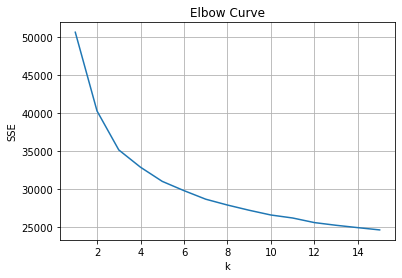

In [202]:
k_5 = (range(1,16))
plt.title("Elbow Curve")
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k_5, SSE_5)
plt.show()

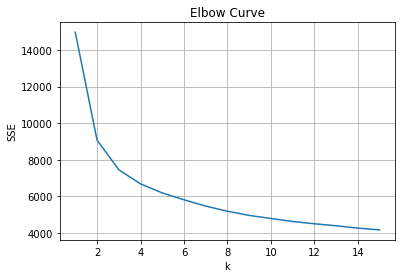

In [170]:
k_cor = (range(1,16))
plt.title("Elbow Curve")
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k_cor, SSE_cor)
plt.show()

In [196]:
model_5 = KMeans(n_clusters = 5, random_state = 424)
model_5.fit(ud6)
SSEs_5 = model_5.inertia_
SSEs_5

30982.417329489494

In [172]:
model_cor = KMeans(n_clusters = 3, random_state = 424)
model_cor.fit(cor_use_df)
SSEs_cor = model_cor.inertia_
SSEs_cor

7449.737732072848

In [173]:
model_cor.cluster_centers_

array([[ 0.05472293, -0.58658612, -0.49892476, -0.55507617, -0.42560441,
        -0.68028374, -0.54784366, -0.50442725, -0.57270168, -0.52503148,
        -0.56526582, -0.58151511, -0.29710741],
       [-0.3400212 ,  1.79217705,  1.33145864,  1.55145021,  1.28634769,
         1.60338843,  1.11668433,  1.44553487,  1.67770033,  1.66656426,
         1.59058935,  1.25033224,  0.57614633],
       [-0.1346027 ,  0.33222381,  0.2713801 ,  0.35112214,  0.26169101,
         0.4440881 ,  0.43098953,  0.41102192,  0.47387504,  0.43929784,
         0.45144   ,  0.22995592,  0.16969735]])

In [197]:
model_5.cluster_centers_

array([[-0.37846483, -0.21101697, -0.4552729 , -0.56945151, -0.42473296,
        -0.23554586, -0.35832459, -0.28886403, -0.31937138, -0.05266099,
         0.09923165, -0.44461876, -0.04775805, -0.16363129, -0.07245265,
        -0.17854411,  0.19419612, -0.25520682, -0.32390497,  0.27237493,
         0.05772439,  0.1613122 ,  0.19043918, -0.55125122, -0.66649594,
         0.60262757, -0.58761318, -0.50667929, -0.69625297, -0.52538165,
        -0.27628836, -0.09840047, -0.76497883, -0.68207857, -0.51260959,
        -0.30843751, -0.55929678, -0.34167854, -0.43699671, -0.05964267,
        -0.61086095, -0.4847681 , -0.40419556, -0.0913152 ],
       [-0.5402381 , -0.06369637, -0.44998201, -0.22632686, -0.38849543,
        -0.10998762, -0.28282012, -0.24130432, -0.40586461,  0.77383717,
         0.33192306, -0.14333309,  0.54151454, -0.20299316,  0.05218298,
         0.80532942, -0.95161441,  0.64996381,  0.74329188,  0.51223229,
         0.84519934,  0.79193428, -0.18690033,  1.6648948 ,  0.

In [175]:
len(model_6.labels_)

1225

In [200]:
clust_means_5 = pd.DataFrame(model_5.cluster_centers_, columns=ud6.columns)
print(clust_means_5)

   medIncome  pctWWage  perCapInc  whitePerCap  blackPerCap  indianPerCap  \
0  -0.378465 -0.211017  -0.455273    -0.569452    -0.424733     -0.235546   
1  -0.540238 -0.063696  -0.449982    -0.226327    -0.388495     -0.109988   
2  -1.056339 -1.053691  -0.919710    -0.802947    -0.671880     -0.323962   
3   0.324423  0.423338   0.342673     0.341831     0.359430      0.269027   
4   1.302285  0.866644   1.223803     1.152805     0.962845      0.601134   

   asianPerCap  otherPerCap  HispPerCap  pctPopUnderPov  ...  Log_burglaries  \
0    -0.358325    -0.288864   -0.319371       -0.052661  ...       -0.512610   
1    -0.282820    -0.241304   -0.405865        0.773837  ...        1.502899   
2    -0.352079    -0.438008   -0.715633        1.325730  ...        0.422123   
3     0.127515     0.303003    0.217084       -0.467304  ...        0.400118   
4     0.669049     0.689681    0.903076       -0.985005  ...       -0.575598   

   Log_burglPerPop  Log_larcenies  Log_larcPerPop  Log_a

In [177]:
clust_means_cor = pd.DataFrame(model_cor.cluster_centers_, columns=cor_use_df.columns)
print(clust_means_cor)

   medIncome  Log_Population  Log_NumImmig  Log_HousVacant  Log_rapes  \
0   0.054723       -0.586586     -0.498925       -0.555076  -0.425604   
1  -0.340021        1.792177      1.331459        1.551450   1.286348   
2  -0.134603        0.332224      0.271380        0.351122   0.261691   

   Log_assaults  Log_assaultPerPop  Log_burglaries  Log_larcenies  \
0     -0.680284          -0.547844       -0.504427      -0.572702   
1      1.603388           1.116684        1.445535       1.677700   
2      0.444088           0.430990        0.411022       0.473875   

   Log_autoTheft  Log_arsons  Log_ViolentCrimesPerPop  Log_nonViolPerPop  
0      -0.525031   -0.565266                -0.581515          -0.297107  
1       1.666564    1.590589                 1.250332           0.576146  
2       0.439298    0.451440                 0.229956           0.169697  


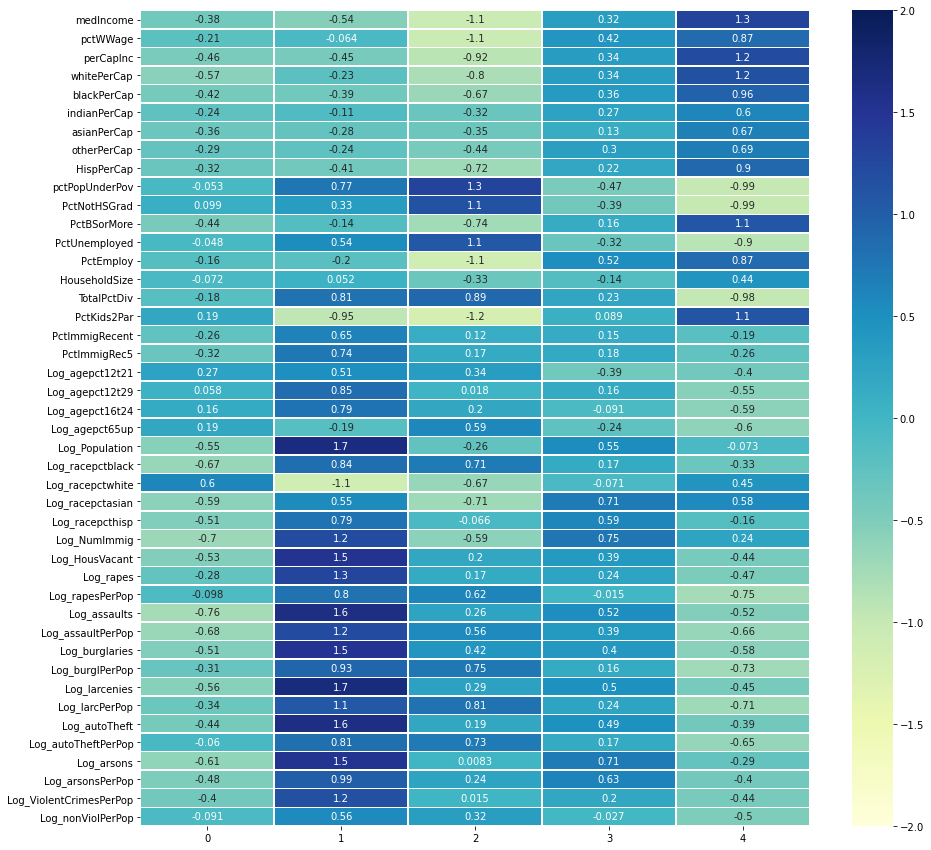

In [201]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(clust_means_5.T, annot=True, linewidths=0.5, cmap='YlGnBu', vmin=-2.0, vmax=2.0)

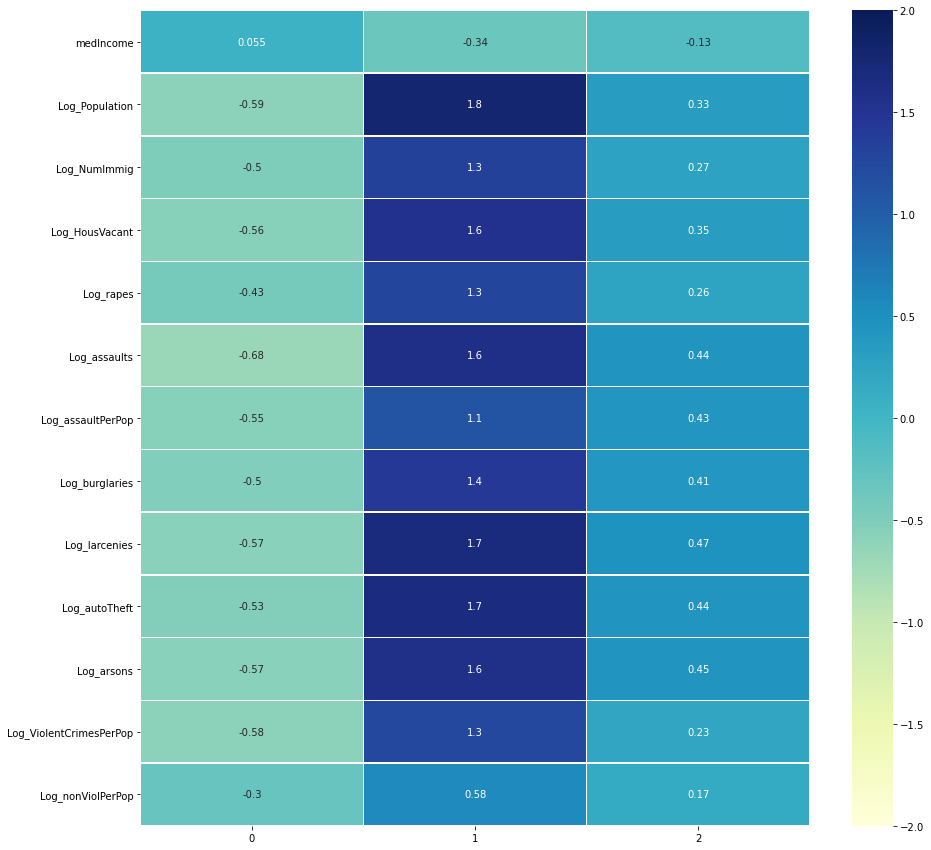

In [179]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(clust_means_cor.T, annot=True, linewidths=0.5, cmap='YlGnBu', vmin=-2.0, vmax=2.0)

In [203]:
df_6clust['cluster'] = model_5.labels_
df_6clust

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State,cluster
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK,1
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK,4
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK,3
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL,1
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,-1.436723,-2.100658,-0.767483,-0.855929,-0.706228,-0.527513,1.455122,-0.643885,-0.570320,1.974283,...,1.195098,1.060460,1.056291,0.756143,0.449139,-0.058941,1.116249,1.129962,WV,2
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0.547582,WY,0
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1.639987,WY,0
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0.120984,WY,0


In [181]:
cor_df['cluster'] = model_cor.labels_
cor_df

,medIncome,Log_Population,Log_NumImmig,Log_HousVacant,Log_rapes,Log_assaults,Log_assaultPerPop,Log_burglaries,Log_larcenies,Log_autoTheft,Log_arsons,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State,cluster
0,0.876345,2.966901,1.884843,3.004296,2.450948,2.155401,1.091143,2.256699,1.968360,2.586872,2.145875,1.989888,0.680567,AK,1
1,1.234794,0.037003,0.200143,0.200717,0.219266,-1.143696,-1.606775,-0.706527,-0.417671,0.100167,-0.161035,-0.054134,0.062051,AK,0
2,-0.197109,0.232294,0.321331,1.026603,0.789659,0.922154,1.128776,0.701692,0.180323,0.625712,0.867172,-0.999713,-1.577354,AK,2
3,-0.759653,0.990247,-0.338452,0.931406,1.005416,1.150486,1.010836,1.623161,1.247670,1.324566,0.976763,1.064480,0.492163,AL,1
4,-0.860033,-0.872536,-1.841107,-0.353038,-1.173172,-0.452474,-0.049729,-0.099189,-0.219521,-0.377621,-0.542571,1.064480,0.492163,AL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,-1.436723,1.022008,-0.279890,1.719382,1.482862,0.945316,0.760704,0.769471,1.195098,1.056291,0.449139,1.116249,1.129962,WV,1
1588,0.554841,-0.983925,-0.875416,-0.417056,-1.173172,-1.398806,-1.297012,-0.745365,-1.005855,-0.668912,-1.266200,-0.308101,0.547582,WY,0
1589,0.118178,-0.534700,-1.551243,0.332075,-0.634503,-1.143696,-1.234481,0.155411,-0.928590,0.085088,-0.732181,0.658741,1.639987,WY,0
1591,-1.313636,0.033717,-0.036902,0.113853,-0.461091,-0.707584,-0.952697,0.176320,-0.730440,0.066208,-0.482484,-0.054134,0.120984,WY,0


In [205]:
df_6clust['cluster'].value_counts().sort_index()

0    274
1    193
2    258
3    288
4    212
Name: cluster, dtype: int64

In [206]:
cor_df['cluster'].value_counts().sort_index()

0    518
1    215
2    492
Name: cluster, dtype: int64

In [184]:
df_6clust[df_6clust['cluster'] == 3]

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State,cluster
15,-0.715860,-0.027724,-0.681299,-0.455885,-0.756650,-0.681777,-0.849653,0.250722,-0.450302,0.764302,...,-0.057621,0.300720,-0.323106,-0.128603,-0.631242,-0.689424,1.064480,0.492163,AL,3
38,-0.830027,0.980438,-1.141844,-1.115789,-0.715472,-0.482967,-0.845283,-0.189946,-0.602825,0.251473,...,0.271047,0.356419,0.527764,0.854401,0.273911,0.336689,0.352698,0.642055,AR,3
40,-1.074940,-0.033116,-1.114911,-1.161090,-0.883040,0.040236,-0.770583,0.539837,-1.654118,1.045244,...,-0.076317,-0.467112,0.604540,0.743223,0.014283,-0.222520,-0.476529,-0.783687,AR,3
42,-1.181808,-0.537197,-1.322740,-1.436725,-0.838837,-0.707529,-1.140396,4.044733,-0.426435,1.290510,...,-0.236329,0.339307,-0.150052,0.618555,-0.311794,0.063008,-1.522897,-1.577354,AR,3
44,-1.019884,-0.039855,-0.940524,-1.037358,-0.720682,-0.595248,-0.871503,-0.614113,-1.568196,0.718222,...,0.004876,0.265270,0.313592,0.899294,-0.212330,-0.144658,-1.522897,-1.945948,AR,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,-1.046195,-0.866063,-0.899228,-0.911147,-0.478489,-0.571693,-0.732619,-0.277469,-0.510311,1.219160,...,0.515256,0.221270,0.699251,0.504606,0.454492,0.206622,-0.170486,-0.574852,WA,3
1510,-0.780738,0.902265,-0.936484,-0.922866,-0.614796,-0.410717,-0.982392,-0.118025,-0.893550,-0.222709,...,-1.151755,-1.431115,-0.314306,0.111751,-1.212054,-1.454872,-0.308101,0.156619,WA,3
1531,-0.815700,-0.310765,-0.803842,-0.937065,-0.707572,-0.365073,-0.650544,-0.410190,-0.881503,0.406065,...,0.754185,0.210616,1.204418,0.944186,0.307280,-0.334977,0.215083,-0.304120,WI,3
1535,-0.785333,-0.801368,-0.506239,-0.504341,-1.289945,-0.295507,-1.500240,-0.398173,-0.689884,0.267824,...,0.021954,-0.495854,0.442066,0.196368,-0.124798,-0.584919,-0.170486,-0.465281,WI,3


In [207]:
six_clust_0 = df_6clust[df_6clust['cluster'] == 0]
six_clust_0.State.value_counts()

MI    26
MN    24
OH    22
PA    18
WI    17
TX    12
IN    12
NY    12
MA    10
NJ    10
OR    10
ME     8
NH     8
OK     7
AR     7
AL     6
TN     5
IA     5
MO     5
VA     5
SD     4
CT     4
CA     4
UT     4
RI     4
FL     3
ND     3
WY     3
CO     2
ID     2
KY     2
WA     2
MD     1
NC     1
AZ     1
MS     1
WV     1
SC     1
IL     1
VT     1
Name: State, dtype: int64

In [208]:
six_clust_1 = df_6clust[df_6clust['cluster'] == 1]
six_clust_1.State.value_counts()

CA    46
TX    21
FL    12
NC    10
VA     8
CO     6
WA     5
IL     5
IN     5
PA     5
GA     4
NY     4
MI     4
AL     4
SC     4
NJ     4
MA     4
AR     3
OK     3
MO     3
IA     3
AZ     3
WI     3
TN     3
LA     3
OH     2
OR     2
CT     2
UT     2
KY     2
DE     1
NV     1
NH     1
KS     1
NM     1
RI     1
MS     1
AK     1
Name: State, dtype: int64

In [209]:
six_clust_2 = df_6clust[df_6clust['cluster'] == 2]
six_clust_2.State.value_counts()

TX    34
MI    16
NC    16
OK    14
CA    13
OH    13
TN    13
NY    11
KY    10
GA    10
OR     9
PA     9
FL     8
AL     8
MS     7
IN     6
LA     6
VA     6
SC     5
MO     5
WA     5
AZ     4
NM     4
MD     3
WV     3
CO     3
NJ     3
AR     2
ID     2
WI     2
MN     2
IA     1
UT     1
CT     1
RI     1
ME     1
IL     1
Name: State, dtype: int64

In [210]:
six_clust_3 = df_6clust[df_6clust['cluster'] == 3]
six_clust_3.State.value_counts()

CA    68
NJ    39
MI    21
TX    16
MA    15
FL    15
CT    12
MN    12
WA    11
CO     7
OK     5
WI     5
AZ     5
OR     5
OH     5
MO     4
IL     4
MD     4
PA     4
RI     4
NH     3
NY     3
IN     3
VA     3
GA     2
AL     2
SD     2
NV     2
ID     1
AK     1
TN     1
ND     1
SC     1
WY     1
UT     1
Name: State, dtype: int64

In [211]:
six_clust_4 = df_6clust[df_6clust['cluster'] == 4]
six_clust_4.State.value_counts()

NJ    40
PA    21
IL    19
MN    17
CT    16
MA    14
CA    13
TX    13
OH    12
MI     7
WI     5
WA     4
MO     3
NH     3
VA     3
RI     3
CO     2
TN     2
NC     2
NY     2
OR     2
IA     2
GA     1
FL     1
AK     1
KY     1
VT     1
IN     1
AL     1
Name: State, dtype: int64

In [191]:
three_clust_0 = cor_df[cor_df['cluster'] == 0]
three_clust_0.State.value_counts()

NJ    49
TX    41
PA    41
MN    38
OH    33
MI    31
MA    21
CA    20
WI    18
CT    17
IL    16
TN    15
IN    15
OR    14
OK    13
NY    12
AL    10
NH    10
MO     9
VA     8
AR     7
FL     7
RI     7
KY     7
NC     7
WA     6
UT     5
ME     5
SD     4
LA     4
CO     4
SC     4
GA     3
WY     3
MD     3
ND     2
IA     2
VT     2
WV     1
AK     1
ID     1
NM     1
MS     1
Name: State, dtype: int64

In [192]:
three_clust_1 = cor_df[cor_df['cluster'] == 1]
three_clust_1.State.value_counts()

CA    51
TX    22
FL    14
MI    10
VA     9
NC     7
WA     7
CO     6
NY     6
PA     6
IN     5
NJ     5
IL     5
AZ     4
CT     4
MA     4
AL     4
OH     4
IA     4
GA     3
NV     3
WI     3
SC     3
OR     3
AR     2
OK     2
MO     2
MN     2
RI     2
TN     2
LA     2
UT     2
NH     1
AK     1
SD     1
KY     1
KS     1
NM     1
WV     1
Name: State, dtype: int64

In [193]:
three_clust_2 = cor_df[cor_df['cluster'] == 2]
three_clust_2.State.value_counts()

CA    73
NJ    42
MI    33
TX    33
MA    18
FL    18
OH    17
NC    15
MN    15
OK    14
NY    14
WA    14
CT    14
OR    11
WI    11
GA    11
CO    10
PA    10
MO     9
IL     9
AZ     9
MS     8
VA     8
IN     7
KY     7
TN     7
AL     7
MD     5
IA     5
RI     4
ME     4
SC     4
NH     4
ID     4
AR     3
NM     3
LA     3
ND     2
WV     2
SD     1
DE     1
AK     1
WY     1
UT     1
Name: State, dtype: int64